##### QProgressBar 進度條
QProgressBar 是 PyQt5 裡的進度條元件，這篇教學會介紹如何在 PyQt5 視窗裡加入 QProgressBar 進度條，並實做使用進度條顯示目前進度的簡單應用。

##### 加入 QProgressBar 進度條 
建立 PyQt5 視窗物件後，透過 QtWidgets.QProgressBar(widget) 方法，就能在指定的元件中建立進度條。

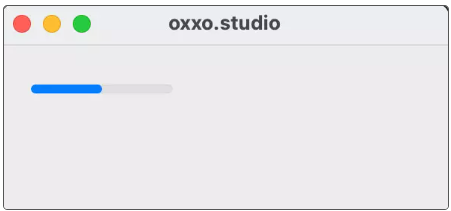

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

bar = QtWidgets.QProgressBar(Form)
bar.move(20,20)
bar.setRange(0, 100)    # 進度條範圍
bar.setValue(50)        # 進度條預設值

Form.show()
sys.exit(app.exec_())

##### QProgressBar 樣式設定 
透過 setStyleSheet() 方法，可以使用類似網頁的 CSS 語法設定 QProgressBar 樣式，下方的程式碼執行後，會將兩個 QProgressBar 設定為不同樣式\
( QProgressBar::chunk 表示目前進度條位置，width 設定為 1 )，根據作業系統的不同，例如 MacOS 要在設定樣式後，才會出現進度百分比的文字。

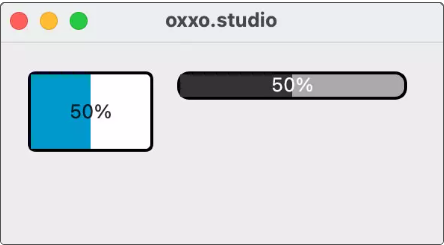

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

bar1 = QtWidgets.QProgressBar(Form)
bar1.move(20,20)
bar1.setRange(0, 100)
bar1.setValue(50)
bar1.setStyleSheet('''
    QProgressBar {
        border: 2px solid #000;
        border-radius: 5px;
        text-align:center;
        height: 50px;
        width:80px;
    }
    QProgressBar::chunk {
        background: #09c;
        width:1px;
    }
''')

bar2 = QtWidgets.QProgressBar(Form)
bar2.move(120,20)
bar2.setRange(0, 100)
bar2.setValue(75)
bar2.setStyleSheet('''
    QProgressBar {
        border: 2px solid #000;
        text-align:center;
        background:#aaa;
        color:#fff;
        height: 15px;
        border-radius: 8px;
        width:150px;
    }
    QProgressBar::chunk {
        background: #333;
        width:1px;
    }
''')

Form.show()
sys.exit(app.exec_())

##### QProgressBar 進度文字設定 
QProgressBar 提供三種文字的顯示格式，透過三種文字顯示格式，能讓進度條的顯示更多變化。

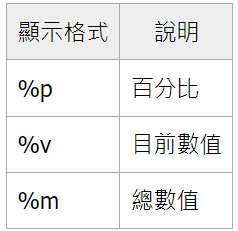

下方的程式碼執行後，會出現三個不同顯示格式的進度條。

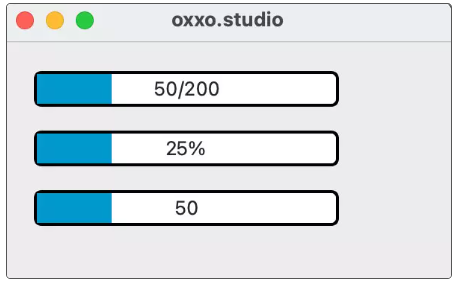

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

style = '''
    QProgressBar {
        border: 2px solid #000;
        border-radius: 5px;
        text-align:center;
        height: 20px;
        width:200px;
    }
    QProgressBar::chunk {
        background: #09c;
        width:1px;
    }
'''

bar1 = QtWidgets.QProgressBar(Form)
bar1.move(20,20)
bar1.setRange(0, 200)
bar1.setValue(50)
bar1.setStyleSheet(style)
bar1.setFormat('%v/%m')

bar2 = QtWidgets.QProgressBar(Form)
bar2.move(20,60)
bar2.setRange(0, 200)
bar2.setValue(50)
bar2.setStyleSheet(style)
bar2.setFormat('%p%')

bar3 = QtWidgets.QProgressBar(Form)
bar3.move(20,100)
bar3.setRange(0, 200)
bar3.setValue(50)
bar3.setStyleSheet(style)
bar3.setFormat('%v')

Form.show()
sys.exit(app.exec_())

##### QProgressBar 常用方法 
下方列出 QSlider 數值調整滑桿的常用方法：

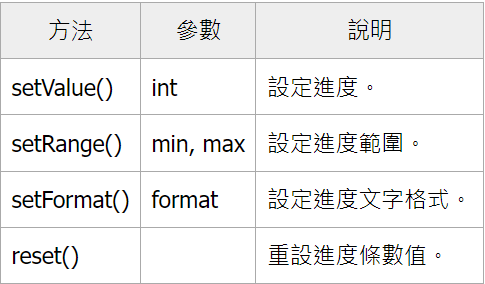

如果將 setValue() 方法中的最小值與最大值設定為「相同數值」，進度條就會呈現「不斷載入」的狀態。

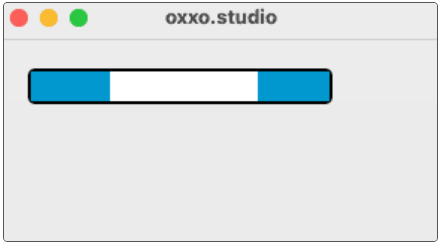

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

style = '''
    QProgressBar {
        border: 2px solid #000;
        border-radius: 5px;
        text-align:center;
        height: 20px;
        width:200px;
    }
    QProgressBar::chunk {
        background: #09c;
        width:1px;
    }
'''

bar = QtWidgets.QProgressBar(Form)
bar.move(20,20)
bar.setRange(0, 0)       # 兩個數值設定相同
bar.setValue(25)
bar.setStyleSheet(style)

Form.show()
sys.exit(app.exec_())

##### 點擊按鈕增加進度 
下方的程式碼執行後，會在畫面中增加兩顆按鈕，一顆按鈕按下時會增加進度，另外一顆按鈕按下時則會重設進度。

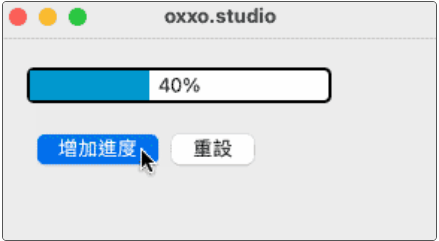

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

style = '''
    QProgressBar {
        border: 2px solid #000;
        border-radius: 5px;
        text-align:center;
        height: 20px;
        width:200px;
    }
    QProgressBar::chunk {
        background: #09c;
        width:1px;
    }
'''

bar = QtWidgets.QProgressBar(Form)
bar.move(20,20)
bar.setRange(0, 200)
bar.setValue(0)
bar.setStyleSheet(style)

n = 0
def more():
    global n
    n = n + 10
    bar.setValue(n)      # 增加進度

def reset():
    global n
    n = 0
    bar.reset()          # 重設進度

btn1 = QtWidgets.QPushButton(Form)   # 增加進度按鈕
btn1.move(20,60)
btn1.setText('增加進度')
btn1.clicked.connect(more)

btn2 = QtWidgets.QPushButton(Form)   # 重設進度按鈕
btn2.move(150,60)
btn2.setText('重設')
btn2.clicked.connect(reset)


Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示。

In [ ]:
# 從 PyQt5 包中導入 QtWidgets 模塊，該模塊包含了一系列用於建立圖形用戶界面的元件。
from PyQt5 import QtWidgets
# 導入 sys 模塊，該模塊用於 Python 腳本與 Python 解釋器的交互，例如命令行參數或系統退出。
import sys

# 定義一個名為 MyWidget 的類，該類繼承自 QtWidgets.QWidget，提供基本的窗口功能。
class MyWidget(QtWidgets.QWidget):
    # 類的建構函數，初始化窗口及其屬性和行為。
    def __init__(self):
        # 調用父類的建構函數來進行基本的初始化。
        super().__init__()
        # 設置窗口的標題。
        self.setWindowTitle('oxxo.studio')
        # 設置窗口的大小。
        self.resize(300, 200)
        # 初始化一個變量 n，用來追蹤進度條的當前進度。
        self.n = 0
        # 調用 ui 方法來構建用戶界面。
        self.ui()

    # 定義一個 ui 方法，用於設置窗口內的元件。
    def ui(self):
        # 定義進度條的樣式。
        style = '''
            QProgressBar {
                border: 2px solid #000;
                border-radius: 5px;
                text-align:center;
                height: 20px;
                width:200px;
            }
            QProgressBar::chunk {
                background: #09c;
                width:1px;
            }
        '''

        # 創建一個 QProgressBar 進度條，並將其父控件設為當前窗口。
        self.bar = QtWidgets.QProgressBar(self)
        # 設置進度條的位置。
        self.bar.move(20,20)
        # 設置進度條的範圍。
        self.bar.setRange(0, 200)
        # 初始化進度條的值為 0。
        self.bar.setValue(0)
        # 應用先前定義的樣式到進度條。
        self.bar.setStyleSheet(style)

        # 創建一個 QPushButton 按鈕，用於增加進度。
        self.btn1 = QtWidgets.QPushButton(self)
        # 設置按鈕位置。
        self.btn1.move(20,60)
        # 設置按鈕顯示的文本。
        self.btn1.setText('增加進度')
        # 將按鈕的 clicked 信號連接到 more 方法，當按鈕被點擊時執行。
        self.btn1.clicked.connect(self.more)

        # 創建另一個 QPushButton 按鈕，用於重設進度。
        self.btn2 = QtWidgets.QPushButton(self)
        # 設置按鈕位置。
        self.btn2.move(110,60)
        # 設置按鈕顯示的文本。
        self.btn2.setText('重設')
        # 將按鈕的 clicked 信號連接到 reset 方法，當按鈕被點擊時執行。
        self.btn2.clicked.connect(self.reset)

    # 定義一個方法 more，用於處理增加進度的功能。
    def more(self):
        # 將 n 增加 10。
        self.n += 10
        # 更新進度條的值為 n。
        self.bar.setValue(self.n)

    # 定義一個方法 reset，用於處理重設進度的功能。
    def reset(self):
        # 將 n 重設為 0。
        self.n = 0
        # 調用進度條的 reset 方法來重設進度。
        self.bar.reset()

# 檢查當前腳本是否作為主程序運行。
if __name__ == '__main__':
    # 創建 QApplication 實例，這是 PyQt5 應用程序的開始。
    app = QtWidgets.QApplication(sys.argv)
    # 實例化 MyWidget 類。
    Form = MyWidget()
    # 顯示窗口。
    Form.show()
    # 啟動事件循環，等待用戶操作。
    sys.exit(app.exec_())